<a href="https://colab.research.google.com/github/ParalelaUnsaac/2020-2/blob/main/184651_Guia_2_Taxonomia_de_Flynn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El siguiente código va a permitir que todo código ejecutado en el colab pueda ser medido

In [ ]:
!pip install ipython-autotime

%load_ext autotime

time: 1.21 ms (started: 2021-01-08 09:04:13 +00:00)


In [ ]:
print(sum(range(10)))

45
time: 1.01 ms


Pregunta #1: Que porción de 1 segundo es el valor impreso?

microsengundos

In [ ]:
print(sum(range(10)))

45
time: 896 µs


milisengundo


---



A seguir, tenemos una librería de Python llamado **numba** que realiza paralelización automatica. Asi, se puede verificar que al usar prange() se tiene mejor tiempo de ejecución que al usar range()

In [ ]:
from numba import njit, prange
import numpy as np

A = np.arange(5, 14000000)
@njit(parallel=True)
def prange_test(A):
    s = 0
    # Without "parallel=True" in the jit-decorator
    # the prange statement is equivalent to range
    for i in prange(A.shape[0]):
        s += A[i]
    return s

print(prange_test(A))

97999992999990
time: 1.01 s


In [ ]:
from numba import njit, prange
import numpy as np
A = np.arange(5, 14000000)
#@njit(parallel=True)
def prange_test(A):
    s = 0
    # Without "parallel=True" in the jit-decorator
    # the prange statement is equivalent to range
    for i in range(A.shape[0]):
        s += A[i]
    return s

print(prange_test(A))



97999992999990
time: 3.79 s


Pregunta #2: identifique otros valores en A, de manera que, serializando, tengamos mejor resultado que paralelizando



---



La Taxonomia de Flynn define 4 tipos de arquitecturas para computación paralela: SISD, SIMD, MISD, y MIMD. 


---


Pregunta #3 : El ultimo código ejecutado es de tipo?

 SIMD



---



Pregunta #4: el siguiente código paralelo es de tipo? Comentar el código para justificar su respuesta

In [ ]:
import threading
import time

#UNA INSTRUCION PARA MOSTRAR EL COUNT Y SU TIEMPO
def print_time(name, n):
    count = 0   
    print("Para el Hilo: %s, en el momento: %s, su valor de count es: %s" % ( name, time.ctime(), count))
    while count < 5:
        time.sleep(n)
        count+=1
        print("%s: %s. count %s" % ( name, time.ctime(), count))

 # INGRESANDO 2 DATOS       
t1 = threading.Thread(target=print_time, args=("Thread-1", 0, ) )
t2 = threading.Thread(target=print_time, args=("Thread-2", 0, ) )

t1.start()
t2.start()

Para el Hilo: Thread-1, en el momento: Wed Dec  9 15:10:55 2020, su valor de count es: 0
Thread-1: Wed Dec  9 15:10:55 2020. count 1
Thread-1: Wed Dec  9 15:10:55 2020. count 2
Thread-1: Wed Dec  9 15:10:55 2020. count 3
Thread-1: Wed Dec  9 15:10:55 2020. count 4
Thread-1: Wed Dec  9 15:10:55 2020. count 5
Para el Hilo: Thread-2, en el momento: Wed Dec  9 15:10:55 2020, su valor de count es: 0time: 14.1 ms

Thread-2: Wed Dec  9 15:10:55 2020. count 1
Thread-2: Wed Dec  9 15:10:55 2020. count 2
Thread-2: Wed Dec  9 15:10:55 2020. count 3
Thread-2: Wed Dec  9 15:10:55 2020. count 4
Thread-2: Wed Dec  9 15:10:55 2020. count 5




---



SIMD 

SOLO SE TIENE UNA SOLO INSTRUCION 
PARA DATOS DIFERENTES SE VA A MOSTRAR DIFERENTES RESULTADOS PARA HILO 1 E HILO2 SEGUN A DATOS INGRESADOS

Una computadora paralela tipo MIMD es utilizado más en la computación distribuida, ejm. Clusters. El siguiente código en python desktop muestra tal funcionamiento

In [ ]:
#greeting-server.py
import Pyro4

@Pyro4.expose
class GreetingMaker(object):
    def get_fortune(self, name):
        return "Hello, {0}. Here is your fortune message:\n" \
               "Behold the warranty -- the bold print giveth and the fine print taketh away.".format(name)

daemon = Pyro4.Daemon()                # make a Pyro daemon
uri = daemon.register(GreetingMaker)   # register the greeting maker as a Pyro object

print("Ready. Object uri =", uri)      # print the uri so we can use it in the client later
daemon.requestLoop()                   # start the event loop of the server to wait for calls

ModuleNotFoundError: ignored

time: 110 ms


In [ ]:
#greeting-client.py
import Pyro4

uri = input("What is the Pyro uri of the greeting object? ").strip()
name = input("What is your name? ").strip()

greeting_maker = Pyro4.Proxy(uri)         # get a Pyro proxy to the greeting object
print(greeting_maker.get_fortune(name))   # call method normally

ModuleNotFoundError: ignored

time: 13.8 ms


Pregunta #5: Explique que hace este código de tipo MIMD



---



Ejercicio Propuesto: Crear un ejemplo que muestre una computación paralela de tipo MISD

In [ ]:
#imput : un solo dato que es el hilo
#procedimiento: 2 procesos para un solo dato
#- primero el valor de hilo aumenta uno en uno 
#- segundo el valor de hilo es multiplicado por 2 bajo restriccion del while 
#ouput: muestra 2 procesos
#- primero muestra el valor del hilo "count" sumando 1 en 1
#- segundo muetsra el valor del hilo "count" multiplicando 2 en 2

import threading
import time

def print_time1(name, n):
    count = 0   
    print("Para el Hilo: %s, en el momento: %s, su valor de count es: %s" % ( name, time.ctime(), count))
    while count < 10:
        count+=1
        print("%s: %s. count %s" % ( name, time.ctime(), count))
def print_time2(name, n):
    count = 1  
    print("Para el Hilo: %s, en el momento: %s, su valor de count es: %s" % ( name, time.ctime(), count))
    while count < 100:
        count*=2
        print("%s: %s. count %s" % ( name, time.ctime(), count))


        
t1 = threading.Thread(target=print_time1, args=("Thread-1", 0, ) )
t1.start()
t1 = threading.Thread(target=print_time2, args=("Thread-1", 0, ) )
t1.start()





Para el Hilo: Thread-1, en el momento: Wed Dec  9 22:04:08 2020, su valor de count es: 0
Thread-1: Wed Dec  9 22:04:08 2020. count 1
Thread-1: Wed Dec  9 22:04:08 2020. count 2
Thread-1: Wed Dec  9 22:04:08 2020. count 3
Thread-1: Wed Dec  9 22:04:08 2020. count 4
Thread-1: Wed Dec  9 22:04:08 2020. count 5
Thread-1: Wed Dec  9 22:04:08 2020. count 6
Thread-1: Wed Dec  9 22:04:08 2020. count 7
Thread-1: Wed Dec  9 22:04:08 2020. count 8
Thread-1: Wed Dec  9 22:04:08 2020. count 9
Thread-1: Wed Dec  9 22:04:08 2020. count 10
Para el Hilo: Thread-1, en el momento: Wed Dec  9 22:04:08 2020, su valor de count es: 1
time: 18.1 ms
Thread-1: Wed Dec  9 22:04:08 2020. count 2
Thread-1: Wed Dec  9 22:04:08 2020. count 4
Thread-1: Wed Dec  9 22:04:08 2020. count 8
Thread-1: Wed Dec  9 22:04:08 2020. count 16
Thread-1: Wed Dec  9 22:04:08 2020. count 32
Thread-1: Wed Dec  9 22:04:08 2020. count 64
Thread-1: Wed Dec  9 22:04:08 2020. count 128


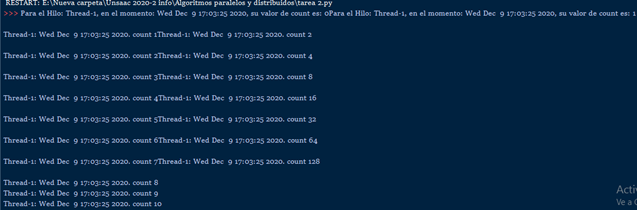

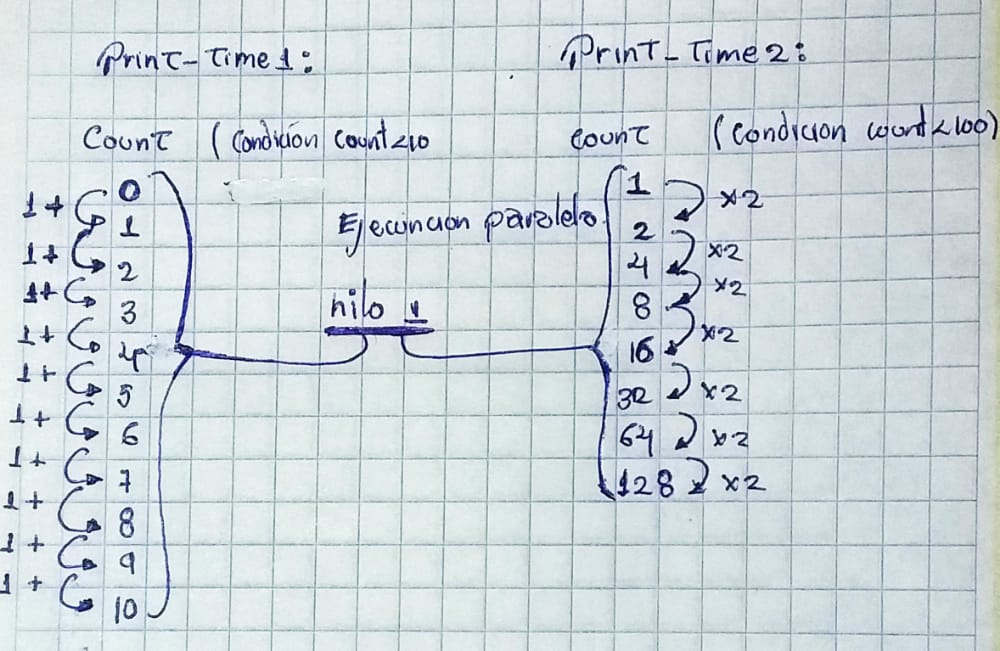

Se puede ver la paralelización MISD  cuando ambos procesos toman el mismo  hilo  de dato y segun sea el proceso se da sus resultados para cada uno.
ademas se observo que el hilo toma 2 valores al mismo tiempo pues hay 2 procesos donde se utiliza este hilo.

**Referencias**

https://wiki.python.org/moin/ParallelProcessing

https://numba.readthedocs.io/en/stable/user/parallel.html

https://ao.gl/how-to-measure-execution-time-in-google-colab/

http://noisymime.org/blogimages/SIMD.pdf